In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Generate a dataframe of SMC dft dataset

In [102]:
#Preparing to match dft data to ligands we use in smc
#Turing smiles from smc to inchi
smc_df = pd.read_excel('smc_data_catagorized.xlsx', engine = 'openpyxl', sheet_name='Vbur_min32_x197')
#smc_inchi = smc_df['Smiles'].map(Chem.MolFromSmiles).map(Chem.MolToInchi)

In [103]:
smc_df.fillna(0)

,Unnamed: 0,SMILES,ID,ID.1,buch,y1,y2,y3,y4,y5,...,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202
0,4,c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1,5,5.0,1.0,51.0,21.0,74.0,83.5,0.0,...,1212.983056,196.1,166.5,47.5,31.8,67,3,9,89,100
1,10,C1CCC(P(C2CCCCC2)C2CCCCC2)CC1,11,11.0,0.0,9.5,18.5,100.0,97.0,19.0,...,605.912194,169.2,163.3,32.0,30.2,38,30,12,37,23
2,13,CP(C(C)(C)C)C(C)(C)C,14,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.042583,164.4,164.2,31.5,31.5,25,26,7,54,15
3,19,CCCCP(CCCC)CCCC,20,20.0,0.0,0.0,0.0,0.0,6.0,0.0,...,389.335167,175.5,141.5,30.0,24.2,37,8,14,38,23
4,20,CCP(CC)CC,21,21.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.388139,159.0,140.3,26.6,24.4,31,4,1,38,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,738,O=C(O)c1cccc(P(c2cccc(C(=O)O)c2)c2cccc(C(F)(F)...,796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1357.208861,160.9,151.0,28.0,27.2,0,0,0,2,0
57,739,O=C(O)c1ccc(P(c2ccc(C(F)(F)F)cc2)c2ccc(C(F)(F)...,797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,135.847000,159.1,159.1,28.2,28.1,1,0,0,3,1
58,740,O=C(O)c1ccc(P(c2ccc(C(=O)O)cc2)c2ccc(C(F)(F)F)...,798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.524667,159.1,159.1,28.2,28.2,0,0,0,2,0
59,741,O=Cc1ccccc1P(c1ccccc1)c1ccccc1,799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.152083,164.5,162.1,31.8,31.2,0,0,0,5,0


Clean up the data
 - clear up non values
 - dropping zero-variance features and similar features

In [107]:
df2 = smc_df.drop(columns = 'SMILES')

In [115]:
df = df2[['x4','x51','x197','x182']]

In [116]:
df

,x4,x51,x197,x182
0,-0.030145,1.088346,31.8,6.092458
1,0.032067,1.280457,30.2,6.090232
2,0.033340,1.141041,31.5,4.888196
3,0.035070,1.202641,24.2,5.615385
4,0.036188,1.279253,24.4,4.787856
...,...,...,...,...
56,-0.078693,4.396320,27.2,6.028940
57,-0.079570,3.257982,28.1,6.027940
58,-0.079880,1.297233,28.2,6.029424
59,-0.074462,4.280181,31.2,6.039198


In [ ]:
from sklearn.preprocessing import scale
# standardize
df=pd.DataFrame(scale(df),index=df.index, columns=df.columns)
# drop zero-variance features
zero_std_cols = df.columns[df.std() == 0]
df=df[df.columns.difference(zero_std_cols)]

In [ ]:
print (f"Dropping {len(zero_std_cols)} features {zero_std_cols}")

Dropping 3 features Index(['y9', 'x122', 'x125'], dtype='object')


In [ ]:
# drop highly correlated features
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df = df.drop(to_drop, axis=1)
print (f"Dropping {len(to_drop)} features {to_drop}")

Dropping 92 features ['ID.1', 'Unnamed: 0', 'x107', 'x108', 'x110', 'x111', 'x114', 'x116', 'x117', 'x118', 'x119', 'x120', 'x124', 'x127', 'x130', 'x131', 'x133', 'x134', 'x135', 'x136', 'x137', 'x138', 'x14', 'x140', 'x142', 'x145', 'x146', 'x149', 'x151', 'x152', 'x153', 'x155', 'x158', 'x159', 'x160', 'x168', 'x17', 'x171', 'x192', 'x196', 'x197', 'x22', 'x29', 'x4', 'x40', 'x41', 'x42', 'x48', 'x49', 'x61', 'x62', 'x63', 'x64', 'x65', 'x69', 'x7', 'x71', 'x72', 'x73', 'x74', 'x75', 'x8', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x94', 'x96', 'x97', 'x98', 'x99', 'y1', 'y10', 'y12', 'y13', 'y15', 'y16', 'y17', 'y18', 'y19', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8']


c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Arbitrarily assign 0 value to all NaN spaces
df.replace(np.nan, 0)
#Dropping some of the incomplete/useless parts of dataset
try:
    df = df.drop(columns = ['Unnamed: 110','y1','y3'])
    df = df.drop(columns = ['y6','y10','y11','y12','y13','y14','y17'])
except:
    pass
df.to_excel("output.xlsx")  


In [ ]:
df= df.drop(columns = ['y11','y14','y2'])

In [ ]:
df= df.drop(columns = ['buch','Unnamed: 110'])

UMAP Dimension Reduction to 2

In [117]:
from sklearn.decomposition import PCA
from umap import UMAP
# define the dimensionalities of the reduced representation to study
dims = [50, 30, 20, 10, 5, 2]
# dictionary to store data at different levels of dimensionality reduction
dfs={}
# UMAP section
n_neighbors = np.int(np.sqrt(df.shape[1]))
for dim in dims:
    key = f"umap{dim}"
    dfs[key] = pd.DataFrame(UMAP(n_components=dim, n_neighbors=n_neighbors, random_state=0).fit_transform(df), index=df.index)
# PCA section
pc = pd.DataFrame(PCA(n_components=None).fit_transform(df), index=df.index)
for dim in dims:
    key = f"pc{dim}"
    dfs[key] = pc.iloc[:, :dim]

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


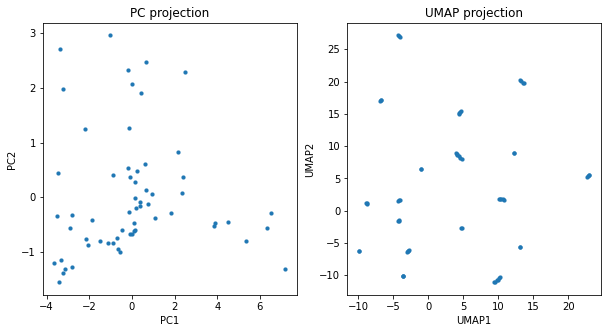

In [118]:
# Visualize the embeddings
f, ax = plt.subplots(1, 2, figsize=(10, 5)) #, dpi=200)
dfs['pc2'].columns = ['PC1', 'PC2']
dfs['umap2'].columns = ['UMAP1', 'UMAP2']
_= sns.scatterplot(x='PC1', y='PC2', data=dfs['pc2'], s=15, alpha=1, linewidth=0.25,  edgecolor='face', ax=ax[0]).set_title("PC projection")
_=sns.scatterplot(x='UMAP1', y='UMAP2', data=dfs['umap2'], s=15, alpha=1, linewidth=0.25, edgecolor='face', ax=ax[1]).set_title("UMAP projection")

Clustering

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata
from sklearn.metrics import silhouette_score
# Define the numbeor of clusters to study
N_CLS_list = list(range(5, 41))
def silhouette_scores_hierarchical(data, n_cls_list):
 """helper function to compute a silhouette score for hierarchical cluster
ing using Ward linkage"""
 
 z = linkage(data, method='ward')
 
 result = pd.Series(index=n_cls_list, dtype=float)
 for n_cls in n_cls_list:
    cls = fcluster(z, n_cls, criterion='maxclust')
    result.loc[n_cls] = silhouette_score(data, cls)
 return result


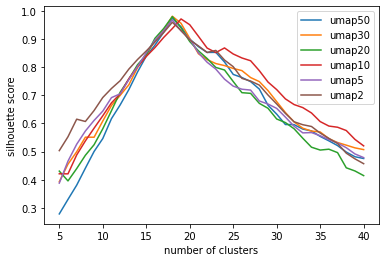

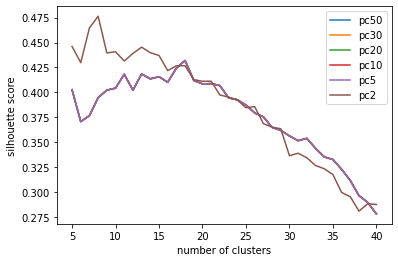

In [120]:
# populate silhouette scores for all number of clusters and all dimensionality reductions that are pre-calculated
silh_scores = pd.DataFrame(index=N_CLS_list)
for key, value in dfs.items():
    silh_scores[key] = silhouette_scores_hierarchical(value, N_CLS_list)
# plot the silhouette scores
_=silh_scores.groupby(silh_scores.columns.str.startswith('pc'), axis=1).plot(
xlabel='number of clusters',ylabel='silhouette score')


Final Clustering

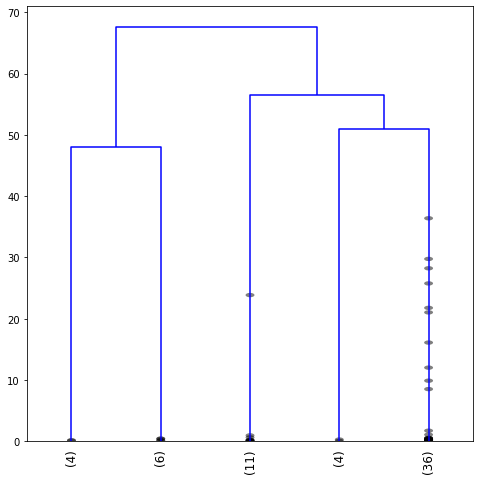

In [121]:
# final number of clusters to produce
NCLS = 5
# linkage and clustering for selected featurization
z = linkage(dfs['umap10'], method="ward")
cls = fcluster(z, NCLS, criterion='maxclust')
# plot the dendrogram
plt.figure(figsize=(8, 8))
_=dendrogram(z, truncate_mode='lastp', p=NCLS, show_contracted=True, leaf_rotation=90, color_threshold=0)


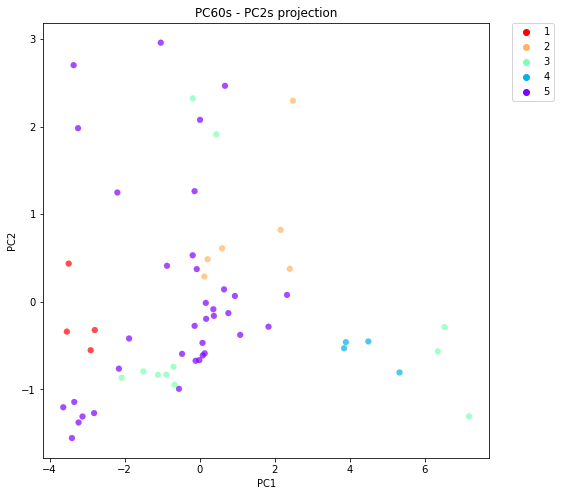

In [122]:
# plot clustering
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PC1", y="PC2", data=dfs['pc2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
 palette='rainbow_r', legend='full', hue=cls).set_title("PC60s - PC2s projection")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


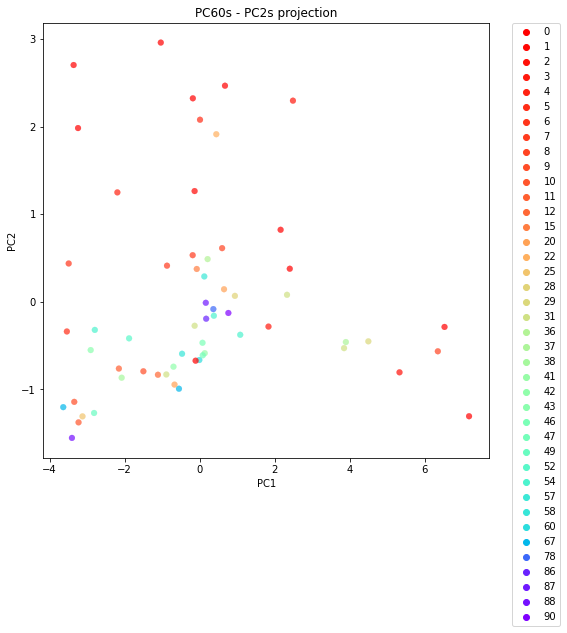

In [123]:
# plot clustering
plt.figure(figsize=(8, 8))
sns.scatterplot(x="PC1", y="PC2", data=dfs['pc2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
 palette='rainbow_r', legend='full', hue=smc_df['x198']).set_title("PC60s - PC2s projection")
_=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

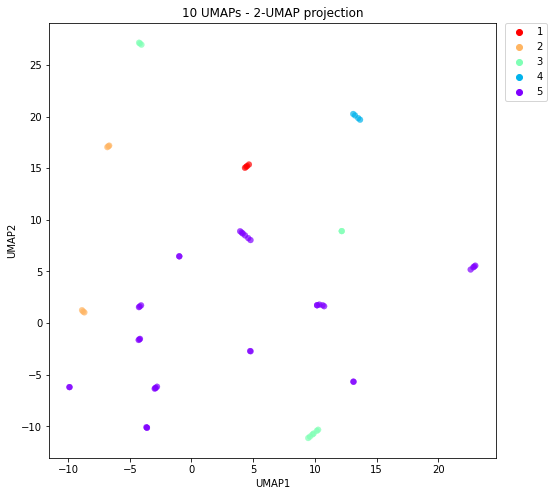

In [124]:
# plot clustering
NCLS = 5
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
 palette='rainbow_r', legend='full', hue=cls).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


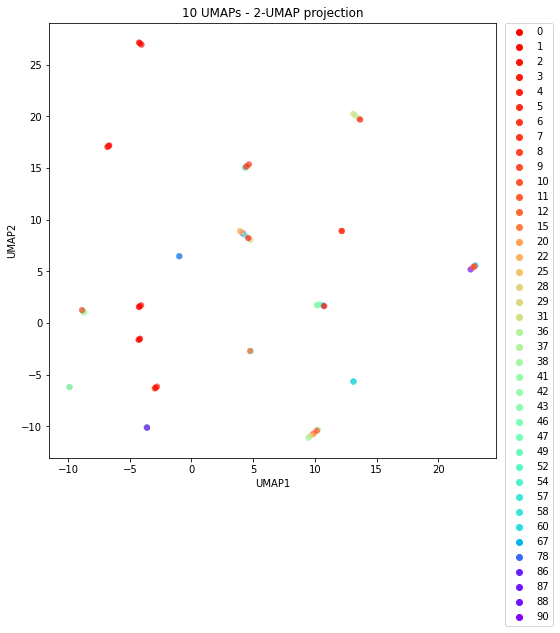

In [125]:
# plot clustering
NCLS = 5
cls = fcluster(z, NCLS, criterion='maxclust')
plt.figure(figsize=(8, 8))
sns.scatterplot(x="UMAP1", y="UMAP2", data=dfs['umap2'], s=35, alpha=0.7, linewidth=0.25, edgecolor='face',
 palette='rainbow_r', legend='full', hue=smc_df['x198']).set_title("10 UMAPs - 2-UMAP projection")
_=plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
